<a href="https://colab.research.google.com/github/Asigen93/Kelompok-RoundTable-Prediksi-Peforma-Pemain-Sepak-Bola-Berdasarkan-Usia-Random-Forest/blob/main/Prediksi%20Peforma%20Pemain%20Bola%20Berdasarkan%20Usia_Random%20Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KELOMPOK RoundTable**
1. Ahmad Sudrajat Dani Kalami
2. Danish Fahmi Anugrah
3. Teguh Chandra Baskara
4. Tirta Romadhon Cipta Saputra

Case yang kami angkat adalah "Prediksi Performa Pemain Berdasarkan Usia" kami menggunakan dataset fifa 18 yang kemudian kami olah dengan menggunakan algoritma "Random Forest" dengan diharapkan hasil yang diperoleh yaitu apakah performa pemain berpengaruh dengan usia mereka?

# **Import Library**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# **Load Dataset**

In [15]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Baca file CSV dari Google Drive
file_path = '/content/drive/MyDrive/Tirta/complete.csv'
data = pd.read_csv(file_path, delimiter=';')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-15-9719668d82db>:7: DtypeWarning: Columns (16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, delimiter=';')


# **Pilih Kolom yang Relevan dan Tangani Nilai yang Hilang**

In [16]:
# Pilih kolom yang relevan dan hapus baris dengan nilai yang hilang
relevant_columns = ['age', 'height_cm', 'weight_kg', 'eur_value', 'potential', 'overall', 'pac', 'sho', 'pas', 'dri', 'def', 'phy']
subset_data = data[relevant_columns].dropna()

# **Mengonversi Kolom Relevan ke Tipe Data Numerik**

In [17]:
# Ubah semua kolom yang relevan menjadi numerik (jika tidak)
for col in relevant_columns:
    subset_data[col] = pd.to_numeric(subset_data[col], errors='coerce')

# **Menghapus Baris yang Mengandung Nilai NaN Setelah Konversi**

In [18]:
# Hapus baris apa pun yang telah menjadi NaN setelah konversi
subset_data = subset_data.dropna()

# **Data Preprocessing**

In [19]:
# Memisahkan data menjadi fitur dan variabel target
X = subset_data.drop(columns=['overall'])
y = subset_data['overall']

# Memisahkan data menjadi set latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Latih Model Random Forest**

In [20]:
# Menginisialisasi dan melatih Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# **Evaluasi Model**

In [21]:
# Memprediksi set tes
y_pred = rf_model.predict(X_test)

# Menghitung kesalahan kuadrat rata-rata
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.19351635553078855


# **Prediksi Performa Berdasarkan Usia**

In [22]:
# Memprediksi Performa berdasarkan usia
def predict_performance(age, height, weight, value, potential, pac, sho, pas, dri, def_, phy):
    return rf_model.predict([[age, height, weight, value, potential, pac, sho, pas, dri, def_, phy]])

# Contoh: Memprediksi performa Cristiano Ronaldo di usia 35 tahun
features_pemain = subset_data[subset_data['age'] == 26].iloc[0]
performa_pemain = predict_performance(36, features_pemain['height_cm'], features_pemain['weight_kg'],
                                             features_pemain['eur_value'], features_pemain['potential'],
                                             features_pemain['pac'], features_pemain['sho'], features_pemain['pas'],
                                             features_pemain['dri'], features_pemain['def'], features_pemain['phy'])

print(f'Predicted Overall Performance for De Gea at age 36: {performa_pemain[0]}')

Predicted Overall Performance for De Gea at age 36: 90.44


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

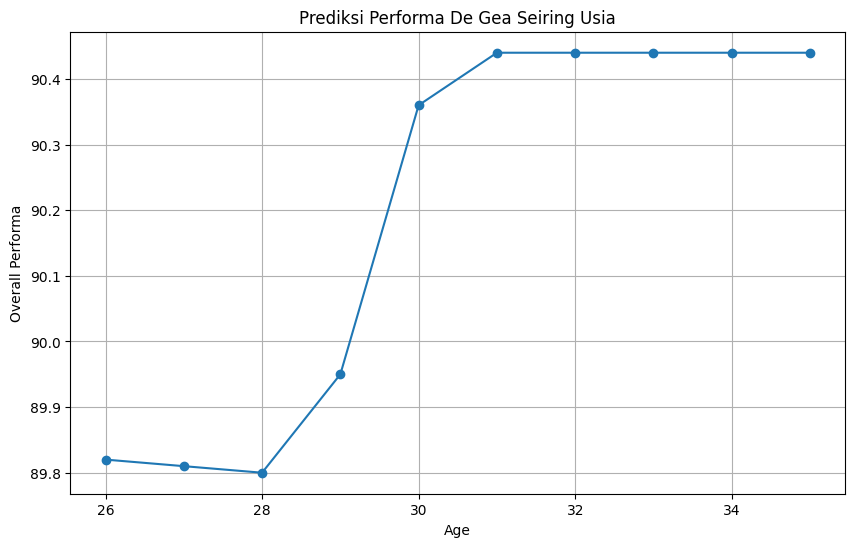

In [23]:
# Memprediksi Performa pada rentang usia
ages = list(range(26, 36))
performa = [predict_performance(age, features_pemain['height_cm'], features_pemain['weight_kg'],
                                    features_pemain['eur_value'], features_pemain['potential'],
                                    features_pemain['pac'], features_pemain['sho'], features_pemain['pas'],
                                    features_pemain['dri'], features_pemain['def'], features_pemain['phy'])[0]
                for age in ages]

# Plotting Performa seiring bertambahnya usia
plt.figure(figsize=(10, 6))
plt.plot(ages, performa, marker='o')
plt.title('Prediksi Performa De Gea Seiring Usia')
plt.xlabel('Age')
plt.ylabel('Overall Performa')
plt.grid(True)
plt.show()